# Hand Drawn Cluster Labeler

This code uses pre-dawn dapi surface image data to automatically group the surface into clusters and return the labels to the original data set. 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan


csv_files = glob.glob('csv_for_tools/*.csv')

# 2. Error if none found
if not csv_files:
    raise FileNotFoundError("No CSV files found in 'csv_for_tools/'")

# 3. Pick the first CSV
first_csv = csv_files[0]
print(f"Reading: {first_csv}")

# 4. Read into a DataFrame
# df = pd.read_csv(first_csv)
df = pd.read_csv(first_csv)

df 

Reading: csv_for_tools/cluster_position_Detailed.csv


,POSITION X,POSITION Y,Position Z,Unit,Category,Collection,Time,ID,Unnamed: 8
0,49529.578,44229.441,1.116,µm,Surface,Position,1,0,NaN
1,49467.621,44290.391,0.977,µm,Surface,Position,1,1,NaN
2,49515.867,44246.172,0.776,µm,Surface,Position,1,2,NaN
3,49315.445,44443.277,2.803,µm,Surface,Position,1,3,NaN
4,49557.926,44204.316,2.187,µm,Surface,Position,1,4,NaN
...,...,...,...,...,...,...,...,...,...
20219,47583.918,41356.871,3.285,µm,Surface,Position,1,20219,NaN
20220,47669.691,41268.441,-1.012,µm,Surface,Position,1,20220,NaN
20221,47700.023,41240.758,0.904,µm,Surface,Position,1,20221,NaN
20222,47647.992,41296.988,0.550,µm,Surface,Position,1,20222,NaN


/Users/patrick/Desktop2/lab_proj1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/patrick/Desktop2/lab_proj1/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cluster label counts: {np.int64(0): np.int64(304), np.int64(1): np.int64(359), np.int64(2): np.int64(464), np.int64(3): np.int64(144), np.int64(4): np.int64(141), np.int64(5): np.int64(913), np.int64(6): np.int64(352), np.int64(7): np.int64(134), np.int64(8): np.int64(266), np.int64(9): np.int64(96), np.int64(10): np.int64(459), np.int64(11): np.int64(2590), np.int64(12): np.int64(242), np.int64(13): np.int64(211), np.int64(14): np.int64(346), np.int64(15): np.int64(114), np.int64(16): np.int64(197), np.int64(17): np.int64(222), np.int64(18): np.int64(208), np.int64(19): np.int64(1504), np.int64(20): np.int64(191), np.int64(21): np.int64(247), np.int64(22): np.int64(567), np.int64(23): np.int64(187), np.int64(24): np.int64(170), np.int64(25): np.int64(129), np.int64(26): np.int64(219), np.int64(27): np.int64(562), np.int64(28): np.int64(320), np.int64(29): np.int64(544), np.int64(30): np.int64(109), np.int64(31): np.int64(231), np.int64(32): np.int64(332), np.int64(33): np.int64(767), 

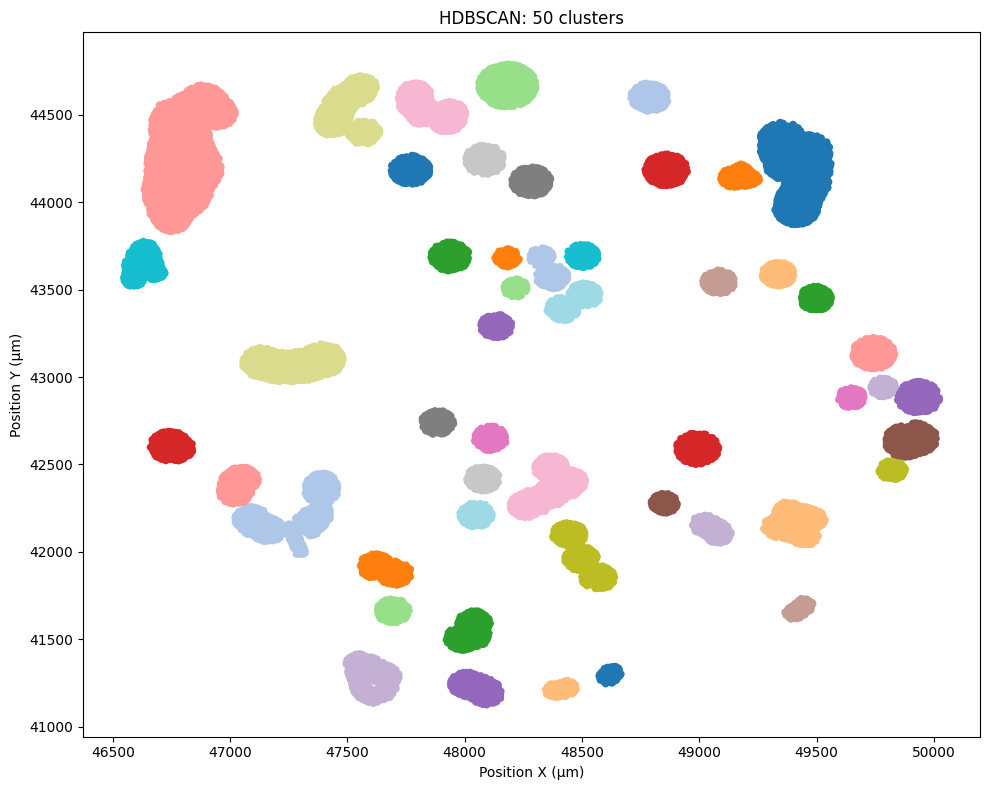

,POSITION X,POSITION Y,Position Z,Unit,Category,Collection,Time,ID,Unnamed: 8,hdbscan_cluster
0,49529.578,44229.441,1.116,µm,Surface,Position,1,0,NaN,19
1,49467.621,44290.391,0.977,µm,Surface,Position,1,1,NaN,19
2,49515.867,44246.172,0.776,µm,Surface,Position,1,2,NaN,19
3,49315.445,44443.277,2.803,µm,Surface,Position,1,3,NaN,19
4,49557.926,44204.316,2.187,µm,Surface,Position,1,4,NaN,19
...,...,...,...,...,...,...,...,...,...,...
20219,47583.918,41356.871,3.285,µm,Surface,Position,1,20219,NaN,29
20220,47669.691,41268.441,-1.012,µm,Surface,Position,1,20220,NaN,29
20221,47700.023,41240.758,0.904,µm,Surface,Position,1,20221,NaN,29
20222,47647.992,41296.988,0.550,µm,Surface,Position,1,20222,NaN,29


In [8]:
# todo assume df's in the future have column called "cluser already" with  0's and 1's and 
# use this to get a subset of the data frame for clustering and return the new labels back to full df

# df = df - where cluster already == 1

coords = df[['POSITION X', 'POSITION Y']].values
coords_scaled = StandardScaler().fit_transform(coords)

# 3) Run HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=1,
    cluster_selection_epsilon=0.0
)
labels = clusterer.fit_predict(coords_scaled)

# 4) Attach labels back to df
#    This works because `labels` is the same length and order as df
df['hdbscan_cluster'] = labels

# 6) Quick check of cluster counts
unique, counts = np.unique(labels, return_counts=True)
print("Cluster label counts:", dict(zip(unique, counts)))

# 7) Prepare for plotting (omit noise if you like)
mask = labels != -1
df_plot = df.loc[mask, ['POSITION X', 'POSITION Y']].copy()
df_plot['cluster'] = df.loc[mask, 'hdbscan_cluster'].astype(str)

# 8) Plot
n_clusters = len(unique) - (1 if -1 in unique else 0)
plt.figure(figsize=(10, 8))

palette = 'tab20' if n_clusters > 10 else 'tab10'
legend = False if n_clusters > 10 else 'full'

sns.scatterplot(
    data=df_plot,
    x='POSITION X', y='POSITION Y',
    hue='cluster',
    palette=palette,
    s=30, linewidth=0,
    legend=legend
)
if legend:
    plt.legend(title='cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.title(f'HDBSCAN: {n_clusters} clusters')
plt.xlabel('Position X (µm)')
plt.ylabel('Position Y (µm)')
plt.tight_layout()
plt.show()
df

# Review the ouput above before continuing

If the graph above looks correct then move to next cell below. Running the next cell will update the csv file and rewrite it by adding the cluster labels column. Make sure you are ok with this before running next cell. 

In [9]:
# 5) (Optional) Save your updated DataFrame
df.to_csv(first_csv, index=False)